# Домашнее задание к лекции "Базовые понятия статистики"

## Обязательная часть

Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. 

### Задание 1. Базовое изучение

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names) и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.

### Задание 2. Работа с выбросами

В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.

### Задание 3. Работа с пропусками

Рассчитать количество выбросов для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('horse_data.csv', names=['surgery', 'age', 'hospital_number', 'rectal_temperature',
                                         'pulse', 'respiratory_rate', 'temperature_of_extremities', 
                                         'peripheral_pulse', 'mucous_membranes', 'capillary_refill_time', 
                                         'pain', 'peristalsis', 'abdominal_distension', 'nasogastric_tube', 
                                         'nasogastric_reflux', 'n_reflux_PH', 'rectal_examination', 
                                         'abdomen', 'packed_cell_volume', 'total_protein', 'abdom_appearance', 
                                         'abdom_total_protein', 'outcome', 'surgical_lesion', 'tol_first', 
                                         'tol_second', 'tol_third', 'cp_data'], header=None, na_values = '?')
df = df[['surgery', 'age', 'rectal_temperature', 'pulse', 
         'temperature_of_extremities', 'mucous_membranes', 'abdominal_distension', 'outcome']]
df

,surgery,age,rectal_temperature,pulse,temperature_of_extremities,mucous_membranes,abdominal_distension,outcome
0,2.0,1,38.5,66.0,3.0,NaN,4.0,2.0
1,1.0,1,39.2,88.0,NaN,4.0,2.0,3.0
2,2.0,1,38.3,40.0,1.0,3.0,1.0,1.0
3,1.0,9,39.1,164.0,4.0,6.0,4.0,2.0
4,2.0,1,37.3,104.0,NaN,6.0,NaN,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,NaN,120.0,4.0,4.0,NaN,3.0
296,2.0,1,37.2,72.0,3.0,4.0,3.0,3.0
297,1.0,1,37.5,72.0,4.0,4.0,3.0,2.0
298,1.0,1,36.5,100.0,3.0,3.0,3.0,1.0


In [3]:
# посмотрим на общие показатели
df.describe()

,surgery,age,rectal_temperature,pulse,temperature_of_extremities,mucous_membranes,abdominal_distension,outcome
count,299.000000,300.000000,240.000000,276.000000,244.000000,253.000000,244.000000,299.000000
mean,1.397993,1.640000,38.167917,71.913043,2.348361,2.853755,2.266393,1.551839
std,0.490305,2.173972,0.732289,28.630557,1.045054,1.620294,1.065131,0.737187
min,1.000000,1.000000,35.400000,30.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,3.000000,3.000000,2.000000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,3.000000,4.000000,3.000000,2.000000
max,2.000000,9.000000,40.800000,184.000000,4.000000,6.000000,4.000000,3.000000


Заметна явная ошибка в составлении таблицы по показателю возраста лошадей. Предположительно "9" - это "2", т.е. особь является молодой. Исправим данный показатель, сделаем замену.


In [4]:
df.loc[df['age'] == 9, 'age'] = 2

In [5]:
temperature_range = df.rectal_temperature.max() - df.rectal_temperature.min()
pulse_range = df.pulse.max() - df.pulse.min()
print(f'Размах температуры: {temperature_range}')
print(f'Размах пульса: {pulse_range}')

Размах температуры: 5.399999999999999
Размах пульса: 154.0


Первоначально видно, что размах в значениях по пульсу и температуре довольно большой. Нормальная температура лошади должна находиться в пределах 37.5-38.5 градусов Цельсия. Отклонение от этой температуры свидетельствует о каком-то заболевании или внешней раны. Пульс у здоровой лошади должен быть порядка 36-42 ударов в минуту.

In [6]:
print(f'Значение моды по пульсу: {df.pulse.round().mode()[0]}, значение медианы по пульсу: {df.pulse.median()}')
print(f'Значение моды по температуре: {df.rectal_temperature.round().mode()[0]}, значение медианы по температуре: {df.rectal_temperature.median()}')

Значение моды по пульсу: 48.0, значение медианы по пульсу: 64.0
Значение моды по температуре: 38.0, значение медианы по температуре: 38.2


В дополнение посмотрим на модальное и медианное значение по данным показателям. По пульсу чаще встречающееся значение - 48 и медиана - 64, что немного или сильно превышает нормальное значение. Показатели температуры же в основном находятся в нормальных значениях. Все это говорит, о частных случаях сильных отклонений от нормальных значений по температуре и, в особенности, пульсу животных.

In [7]:
# тыкнем пальцем в небо (определим выбросы вручную) и посмотрим, как изменились средние
print(df.pulse.median())
print(df[(df.pulse > 30) & (df.pulse < 135)].pulse.median())
print(df.pulse.mean())
print(df[(df.pulse > 30) & (df.pulse < 135)].pulse.mean())

64.0
64.0
71.91304347826087
69.50188679245284


In [13]:
q1_pulse = df.pulse.quantile(0.25)
q3_pulse = df.pulse.quantile(0.75)
iqr_pulse = q3_pulse - q1_pulse
lower_bound = q1_pulse - (1.5 * iqr_pulse) 
upper_bound = q3_pulse + (1.5 * iqr_pulse)
remove_outliers_pulse = df[df.pulse.between(lower_bound, upper_bound, inclusive=True)].sort_values('pulse')
remove_outliers_pulse

,surgery,age,rectal_temperature,pulse,temperature_of_extremities,mucous_membranes,abdominal_distension,outcome
130,1.0,1,37.8,30.0,NaN,NaN,NaN,2.0
232,1.0,1,38.5,30.0,NaN,NaN,NaN,1.0
203,2.0,1,37.2,36.0,1.0,1.0,1.0,1.0
276,1.0,1,38.0,36.0,3.0,1.0,2.0,3.0
242,1.0,1,NaN,36.0,1.0,4.0,3.0,2.0
...,...,...,...,...,...,...,...,...
148,1.0,1,38.3,132.0,NaN,6.0,2.0,1.0
135,1.0,2,38.1,136.0,3.0,3.0,3.0,2.0
44,1.0,1,35.4,140.0,3.0,4.0,NaN,3.0
103,1.0,2,38.0,140.0,1.0,1.0,2.0,1.0


In [8]:
q1_temp = df.rectal_temperature.quantile(0.25)
q3_temp = df.rectal_temperature.quantile(0.75)
iqr_temp = q3_temp - q1_temp
lower_bound_temp = q1_temp - (1.5 * iqr_temp) 
upper_bound_temp = q3_temp + (1.5 * iqr_temp)
remove_outliers_temp = df[df.rectal_temperature.between\
                                 (lower_bound_temp, upper_bound_temp, inclusive=True)].sort_values('rectal_temperature')
remove_outliers_temp

,surgery,age,rectal_temperature,pulse,temperature_of_extremities,mucous_membranes,abdominal_distension,outcome
113,1.0,1,36.8,60.0,NaN,NaN,NaN,2.0
277,2.0,1,36.9,50.0,2.0,3.0,2.0,1.0
70,2.0,1,37.0,60.0,3.0,NaN,3.0,3.0
292,1.0,1,37.0,66.0,1.0,2.0,3.0,2.0
190,1.0,1,37.1,40.0,NaN,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...
165,1.0,1,39.4,120.0,NaN,5.0,3.0,3.0
231,2.0,1,39.5,92.0,3.0,6.0,1.0,2.0
287,2.0,2,39.5,84.0,NaN,NaN,NaN,1.0
117,2.0,1,39.5,NaN,3.0,4.0,3.0,3.0


In [19]:
# найдем выбросы по температуре
q1_ = df.rectal_temperature.quantile(0.25)
q3_ = df.rectal_temperature.quantile(0.75)
iqr_ = q3_ - q1_
lower_bound_ = q1_ - (1.5 * iqr_) 
upper_bound_ = q3_ + (1.5 * iqr_)

s = df[(df.rectal_temperature > upper_bound_) | (df.rectal_temperature < lower_bound_)].sort_values('rectal_temperature')
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 238 to 259
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     11 non-null     float64
 1   age                         11 non-null     int64  
 2   rectal_temperature          11 non-null     float64
 3   pulse                       11 non-null     float64
 4   temperature_of_extremities  11 non-null     float64
 5   mucous_membranes            11 non-null     float64
 6   abdominal_distension        11 non-null     float64
 7   outcome                     11 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 792.0 bytes


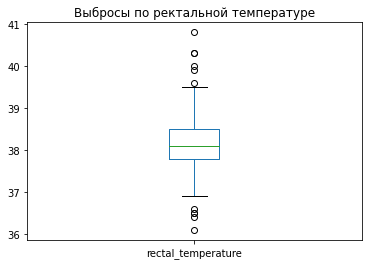

In [22]:
# Изобразим выбросы на графике
df.rectal_temperature.plot(kind='box', title='Выбросы по ректальной температуре')

In [26]:
# найдем выбросы по температуре
q1_p = df.pulse.quantile(0.25)
q3_p = df.pulse.quantile(0.75)
iqr_p = q3_p - q1_p
lower_bound_p = q1_p - (1.5 * iqr_p) 
upper_bound_p = q3_p + (1.5 * iqr_p)

s_p = df[(df.pulse > upper_bound_p) | (df.pulse < lower_bound_p)].sort_values('pulse')
s_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 41 to 255
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     5 non-null      float64
 1   age                         5 non-null      int64  
 2   rectal_temperature          5 non-null      float64
 3   pulse                       5 non-null      float64
 4   temperature_of_extremities  4 non-null      float64
 5   mucous_membranes            4 non-null      float64
 6   abdominal_distension        4 non-null      float64
 7   outcome                     5 non-null      float64
dtypes: float64(7), int64(1)
memory usage: 360.0 bytes


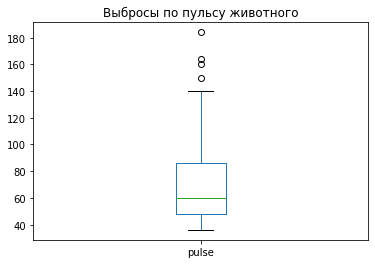

In [25]:
# Изобразим выбросы на графике
df.pulse.plot(kind='box', title='Выбросы по пульсу животного')

В ходе расчетов выбросов по показателям пульса и температуры лошадей из 300 остались 271 и 226 строк соответственно. Это говорит нам о том, что  было много пустых значений и то, что показатели температуры были с наибольшим количеством выбросов. Возможно часть вовсе и не была выбросами, а сильно завышенный или заниженный показатель обусловлен затянутой болезнью животного, сепсисом и т.п.

По пульсу было исключено меньшее количество строк, а за актуальные данные были приняты показатели 30-146 уд/мин. Разброс по пульсу большой, но он также обусловлен затяжной болезнью и неудовлетворительным состоянием животных. Также, возможно, что у части лошадей наблюдается повышенный пульс вследствие испуга животного при прохождении обследования ветеринаром.

In [10]:
# посмотрим долю пустых значений в отчете
for skip in df.columns:
    pct_missing = df[skip].isnull().mean()
    print(f'{skip} - {pct_missing :.1%}')

surgery - 0.3%
age - 0.0%
rectal_temperature - 20.0%
pulse - 8.0%
temperature_of_extremities - 18.7%
mucous_membranes - 15.7%
abdominal_distension - 18.7%
outcome - 0.3%


Мы видим, что показатели с наибольшей долей пропусков в значениях: ректальная температура, бал температуры конечностей, бал вздутия живота и бал состояния слизистой оболочки лошади. Процент варьируется от 15,7% до 20%, что говорит о том, что удаление нулевых значений из общего анализа скажется на конечном результате. Необходимо по возможности восстановить потерянные данные. Возможно, что показания не были указаны в данном наборе данных, потому что они не указывались при осмотре ветеринаром из-за неудовлетворительного состояния животного. Скорее всего по первому осмотру был сделан вывод, чтобы животное усыпить или оно было уже в предсмертном состоянии.

Потери показания пульса находится в допустимом значении (8%), но то, что он не заполнен можно также отнести к выводу, сделанному выше.

Показания по результату операции (была или не была) и итоговый результат, осталось животное жить далее или было усыплено/умерло, находятся в допустимых значениях и скорее всего не было заполнено из-за ошибки ввода в набор данных.

Выведем в итоге датафрейм, исключающий пустые значения в наборе данных и выведем его на экран. Также посмотрим на распределение кол-ва животных по результату на графике. Возможные значения: 1 - жил, 2 - умер, 3 - был усыплен.

In [15]:
df.dropna(inplace=True)
df

,surgery,age,rectal_temperature,pulse,temperature_of_extremities,mucous_membranes,abdominal_distension,outcome
2,2.0,1,38.3,40.0,1.0,3.0,1.0,1.0
3,1.0,2,39.1,164.0,4.0,6.0,4.0,2.0
6,1.0,1,37.9,48.0,1.0,1.0,3.0,1.0
9,2.0,2,38.3,90.0,1.0,1.0,1.0,1.0
10,1.0,1,38.1,66.0,3.0,5.0,1.0,1.0
...,...,...,...,...,...,...,...,...
292,1.0,1,37.0,66.0,1.0,2.0,3.0,2.0
294,2.0,1,38.5,40.0,1.0,1.0,1.0,1.0
296,2.0,1,37.2,72.0,3.0,4.0,3.0,3.0
297,1.0,1,37.5,72.0,4.0,4.0,3.0,2.0


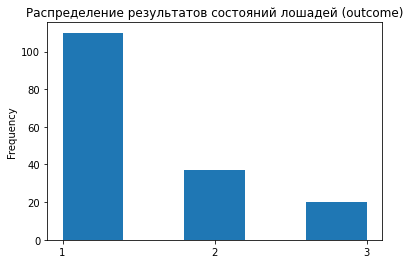

In [44]:
df.outcome.plot(kind='hist', 
                   bins=5,
                   title='Распределение результатов состояний лошадей (outcome)',
                   xticks=range(1, 4))

## Дополнительная часть (необязательная)

Выполнить задания 1-3 для всего набора данных.